# Project: CRNN based Music Genre Classification

### Group mumbers
| Name             | StuID  |
|-------------------|-----------|
| Liang Zhongcheng   | 2301212244   |
| Sun Shuo| 2301212255   |
| Wen Qianhao | 2301212266   |

## Introduction
Digital audio files are uploaded to the Internet in enormous quantities due to the quick development of multimedia technologies. A lot of effort has been put into research in Music Information Retriecal(MIR) to deal with various audio tasks. A very core issue of MIR is classifying the music into various genres. Our group concontrate on Music Genre Classification and use a dataset from the GTZAN Genre Dataset to train our model. 

## GTZAN Genre Dataset

This dataset consists of 1000 audio tracks, each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

The genres are:
- blues
- classical
- country
- disco
- hiphop
- jazz
- metal
- pop
- reggae
- rock

We are unable to upload the complete GTZAN database within the project. For more information about the database, please refer to the following link.
[GTZAN in TensorFlow](https://tensorflow.google.cn/datasets/catalog/gtzan)

## Data Prcoessing
The sourse files for the dataset are various types of music audio. We refer to the mainstream method of machine learning for audio processing, which is the Mel spectrogram. A Mel spectrogram is a visual representation of the spectrum of frequencies in an audio signal as they vary with time, using the Mel scale to map frequency. 

How does a Mel spectrogram process audio files?

- **Convert to Frames**: The audio signal is divided into short frames.
- **Fourier Transform**: Each frame undergoes a Short-Time Fourier Transform (STFT) to convert it from time domain to frequency domain.
- **Apply Mel Filter Bank**: The resulting frequency components are passed through a set of Mel filter banks to emphasize perceptually important frequencies.
- **Logarithmic Compression**: The amplitude of each Mel-scaled frequency is converted to a logarithmic scale.
- **Visual Representation**: The result is a matrix representing the intensity of frequencies (in Mel scale) over time. 

Mel spectrogram can be treated as images, enabling the use of powerful convolutional neural networks for feature extraction, by Andén, Joakim & Mallat, Stéphane. (2011).

In Python, the `librosa` package is widely used for extracting Mel spectrograms from audio files. Below are the difference between the two kinds of spectrum, the music genre is Blues:

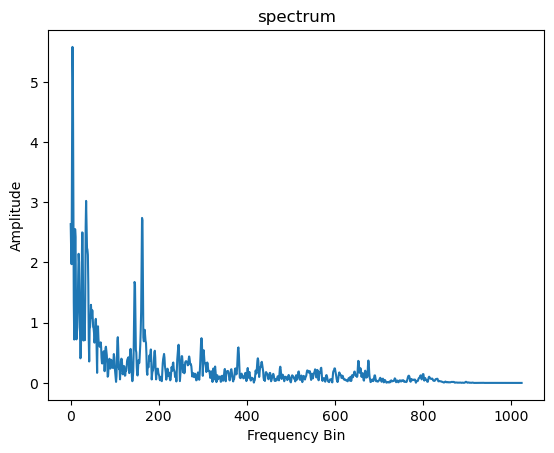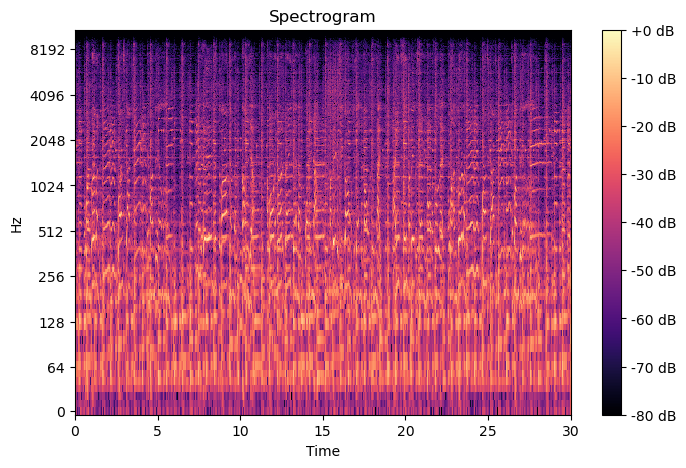

This image below is a map of the Mel spectrogram for all music genres, demonstrating the unique spectral patterns associated with each genre. 

Each genre has distinct patterns in the Mel spectrogram. For example, metal music may have dense high-frequency content, while jazz might emphasize mid to low frequencies. The time-frequency representation captures the temporal dynamics of the music. Disco and Blues music show repetitive patterns, which can be linked to their rhythmic structures, while jazz has more varied patterns reflecting its improvisational nature.

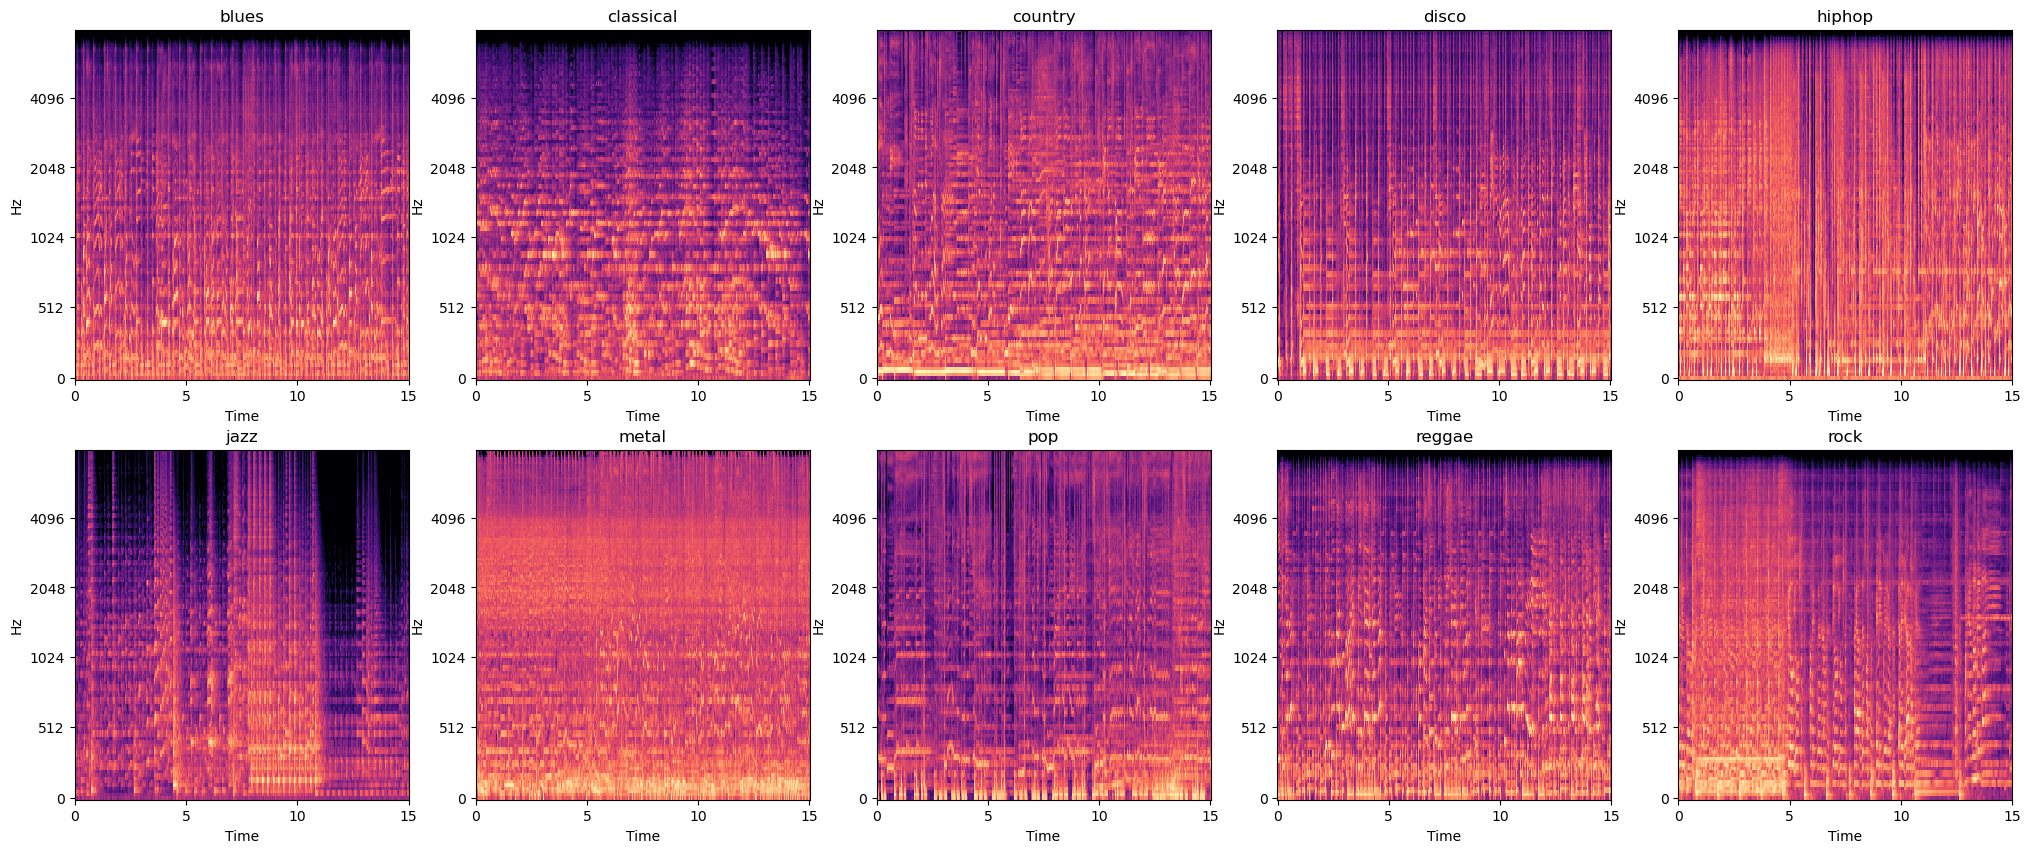

## Methodogy

The main method we use is convolutional recurrent neural networks. Convolutional recurrent neural networks combine the advantages of convolutional neural networks and recurrent neural networks to take advantage of both the spatial and temporal characteristics of data. We believe that a single neural network cannot capture and utilize the features of the time series, and for music, it is necessary not only to recognize the spectrogram, but also to capture the connections on the time series to enhance the prediction ability of the model.

To compare with the CRNN model, we also constructed a FFNN and a CNN.

### FFNN as benchmark

A Feedforward Neural Network (FFNN) is a type of artificial neural network where connections between the nodes do not form cycles. FFNNs are used for various tasks such as classification, regression, and function approximation.

We constructed an FFNN model with three hidden layers, containing 128, 128, and 64 units respectively, and used the ReLU activation function and softmax output function. As we anticipated, the results indicated that our FFNN model was completely ineffective at classifying music genres.

-Results from FFNN

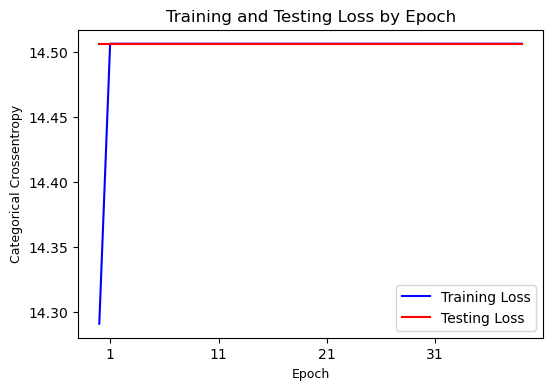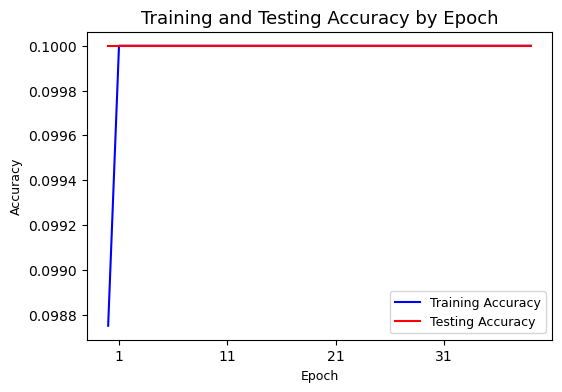


### CNN as benchmark
The CNN processes spectrogram images through convolutional layers, which detect local patterns like rhythms and harmonics unique to each genre. Pooling layers reduce dimensionality and focus on significant features. These extracted features are then passed through fully connected layers to combine the information and make a final genre classification. 

We train and test the following CNN model on our training and test sets.

| Parameter Name | Parameter Value  |
|-------------------|-----------|
| Number of Convolution Layers   | 4  |
| Kernel sizes| (4, 4) ,(4, 4),(4, 4),(4, 4)  |
| Max Pooling kernel size | (2, 4),(2, 4),(2, 4),(2, 4)   |
| Activation function | ReLU   |
|Dropout after connection layer |0.25|

The two graphs depict the training and testing loss, as well as the training and testing accuracy over epochs for a CNN used for music genre classification.

The training loss consistently decreases, indicating the model is learning and fitting well to the training data. The testing loss decreases initially but starts to increase after around 50 epochs, suggesting **overfitting**. The model performs well on training data but poorly generalizes to unseen data.

The training accuracy improves steadily, reaching around 85% by the end of training. The testing accuracy increases initially but plateaus and fluctuates around 50-55%, indicating the model struggles to maintain high accuracy on the testing set, further evidencing **overfitting**.

Overall, the CNN shows good learning on the training data but exhibits significant overfitting, as indicated by the divergence between training and testing performance.


Results from CNN:

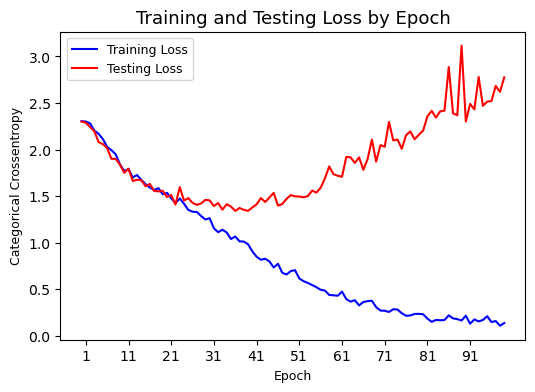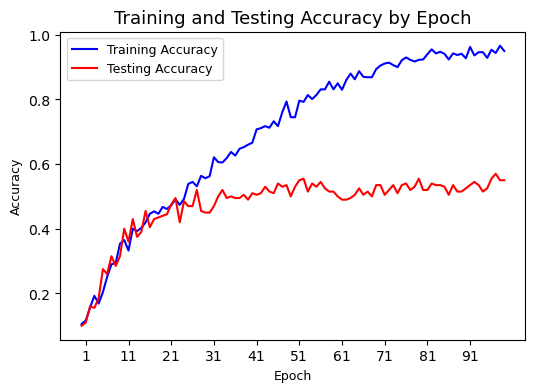

In terms of the model architecture:
Three convolutional layers combined with pooling layers are used, with the activation function being ReLU.
A reshaping layer is employed to convert the three-dimensional output of the convolutional layers into the two-dimensional input required by the RNN layers.
Two LSTM (Long Short-Term Memory) recurrent layers are then utilized.
In the final part of the model architecture, two fully connected layers are used, with the activation functions being ReLU for the first layer and Softmax for the output layer.

Additionally, we also compared the results of the CNN model, FFNN model, and CRNN model.

### CRNN

CRNN is a combination of convolutional neural network and recurrent neural network, which can capture the feature and time dependence of the image. When applied to the Mel spectrogram, RNNs are able to efficiently extract time-series features from audio signals, which is critical for music classification.

We train and test the following CRNN model on our training and test sets.

| Parameter Name | Parameter Value  |
|-------------------|-----------|
| Number of Convolution Layers   | 4  |
| Kernel sizes| (3, 3) , (3, 3) , (3, 3) , (3, 3)  |
| Max Pooling kernel size | (2, 2) , (3, 3) , (4, 4) , (4, 4)   |
| Dropout | 0.1|
| Activation function | ReLU   |
| Number of LSTM layers| 2 |
| Units | 20 , 20 |
| Number of Dense| 2 |
| Units | 32 , 10 |
| Activation | ReLU, Softmax|


Let's look at the figure on the left (Training and Testing Loss by Epoch): As the number of cycles increases, the training loss gradually decreases. This indicates that the model is fitting the training data step by step. Test loss was initially higher compared to training loss, but also decreased over time. However, in some cycles, it may fluctuate or rise, which may indicate an overfitting phenomenon.

Let's look at the figure on the right (Training and Testing Accuracy by Epoch): The training accuracy continues to improve with the increase of the number of epochs, indicating that the model is performing better and better on the training set.Test accuracy is similar to training accuracy, and test accuracy is improving, but it fluctuates over certain cycles. This may be due to the instability of the model when it comes to processing unseen data.

Based on the above information, the following conclusions can be drawn:
The CRNN model can effectively reduce the loss and improve the accuracy during the training process. While both training loss and accuracy are improving, the test metrics sometimes fluctuate or rise, which can indicate some degree of overfitting issues.

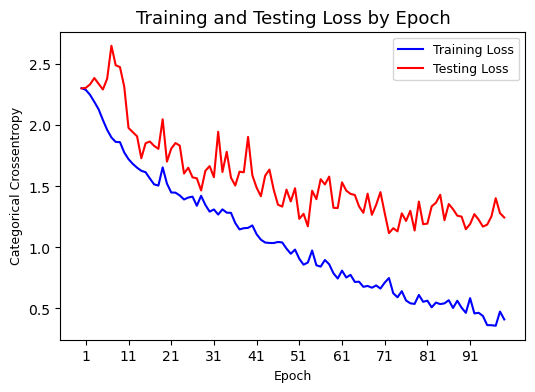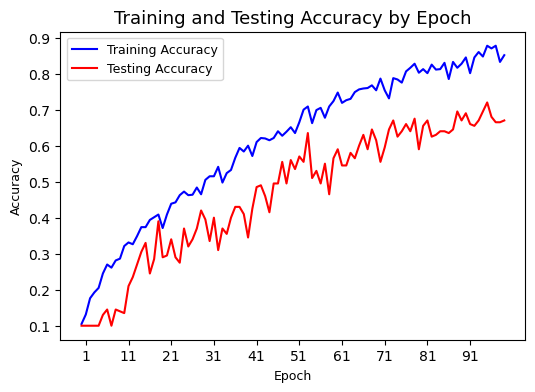

By looking at the heatmap from CRNN model, our model predicts that jazz is less effective than other music genres and is often considered blues, which is a realistic fact because jazz is a musical style that evolved from blues.

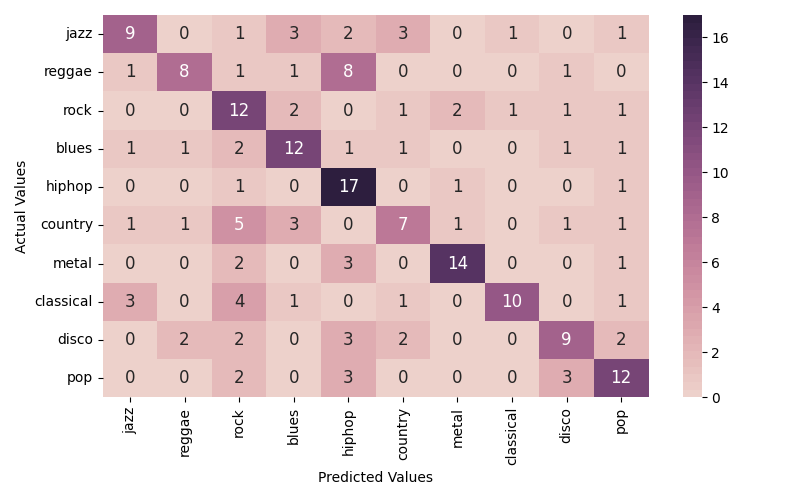

Comparion the results of the CNN model, FFNN model, and CRNN model.

| Model                                     | Test Accuracy     |
|:------------------------------------------|:------------------|
| Feedforward Neural Network (FFNN)         | 0.100         |
| Convolutional Neural Network (CNN)        | 0.525         |
| Convolutional Recurrent Neural Network(CRNN)    | 0.670         |


Looking at the overall test performance, the FFNN accuracy is 10%, which is close to random prediction, because the total number of music types we used is 10, and the CNN model has a prediction accuracy of 52.5%, which can already predict half of the effect, while the CRNN prediction accuracy of the model we optimized is 67%, which further improves the accuracy. 

For future research prospects, we hope to add more complex models and find more accurate and complete data types to capture audio to refine our subsequent models.